In [4]:
!pip install gensim

In [5]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('train_en.txt', sep='\t')

In [7]:
data

,Sentence,Style
0,he had steel balls too !,toxic
1,"dude should have been taken to api , he would ...",toxic
2,"im not gonna sell the fucking picture , i just...",toxic
3,the garbage that is being created by cnn and o...,toxic
4,the reason they dont exist is because neither ...,toxic
...,...,...
25035,both sides need to calm down or we are heading...,neutral
25036,i 'm sitting here in my calm german city conte...,neutral
25037,"dude , get a clue .",neutral
25038,"I was so high, it was amazing.",neutral


In [8]:
 import nltk
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
data['Tokens'] = data['Sentence'].apply(lambda x: word_tokenize(x))

In [10]:
data

,Sentence,Style,Tokens
0,he had steel balls too !,toxic,"[he, had, steel, balls, too, !]"
1,"dude should have been taken to api , he would ...",toxic,"[dude, should, have, been, taken, to, api, ,, ..."
2,"im not gonna sell the fucking picture , i just...",toxic,"[im, not, gon, na, sell, the, fucking, picture..."
3,the garbage that is being created by cnn and o...,toxic,"[the, garbage, that, is, being, created, by, c..."
4,the reason they dont exist is because neither ...,toxic,"[the, reason, they, dont, exist, is, because, ..."
...,...,...,...
25035,both sides need to calm down or we are heading...,neutral,"[both, sides, need, to, calm, down, or, we, ar..."
25036,i 'm sitting here in my calm german city conte...,neutral,"[i, 'm, sitting, here, in, my, calm, german, c..."
25037,"dude , get a clue .",neutral,"[dude, ,, get, a, clue, .]"
25038,"I was so high, it was amazing.",neutral,"[I, was, so, high, ,, it, was, amazing, .]"


In [11]:
sentences = data['Tokens'].values.tolist()
sentences

[['he', 'had', 'steel', 'balls', 'too', '!'],
 ['dude',
  'should',
  'have',
  'been',
  'taken',
  'to',
  'api',
  ',',
  'he',
  'would',
  'be',
  'right',
  'at',
  'home',
  'with',
  'all',
  'the',
  'other',
  'knuckleheads',
  'there'],
 ['im',
  'not',
  'gon',
  'na',
  'sell',
  'the',
  'fucking',
  'picture',
  ',',
  'i',
  'just',
  'want',
  'to',
  'contribute',
  'to',
  'the',
  'fucking',
  'article',
  '.'],
 ['the',
  'garbage',
  'that',
  'is',
  'being',
  'created',
  'by',
  'cnn',
  'and',
  'other',
  'news',
  'agencies',
  'is',
  'outrageous',
  '.'],
 ['the',
  'reason',
  'they',
  'dont',
  'exist',
  'is',
  'because',
  'neither',
  'is',
  'a',
  'pathological',
  'liar',
  'like',
  'trump',
  '.'],
 ['i', 'hope', 'they', 'beat', 'each', 'other', 'silly', '.'],
 ['no',
  'good',
  'bastards',
  'that',
  'we',
  'are',
  'and',
  'we',
  'are',
  'unrepentant',
  'about',
  'it',
  '.'],
 ['stop', 'the', 'coverage', 'and', 'let', 'em', 'rot', '

In [12]:
word2vec_model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

In [13]:
word2vec_model.wv.index_to_key

['.',
 'the',
 ',',
 'to',
 'a',
 'you',
 'i',
 'is',
 'that',
 'shit',
 '?',
 'and',
 '!',
 'of',
 'it',
 'this',
 'in',
 'fuck',
 'are',
 'I',
 "'s",
 'do',
 'for',
 'not',
 'fucking',
 'my',
 'on',
 "'t",
 'they',
 'be',
 'me',
 'like',
 'just',
 'with',
 'was',
 'what',
 'about',
 'have',
 'up',
 'he',
 'your',
 'so',
 'get',
 'but',
 'people',
 "n't",
 'we',
 'all',
 'ass',
 'can',
 "'m",
 'if',
 'out',
 'as',
 'who',
 'how',
 'why',
 '``',
 'lol',
 'no',
 'bad',
 'know',
 'would',
 'at',
 'some',
 'don',
 '-',
 'good',
 'got',
 'now',
 'one',
 'when',
 'will',
 'them',
 'bitch',
 'think',
 'or',
 'did',
 'there',
 'thing',
 'their',
 'she',
 'go',
 'an',
 'going',
 'really',
 'from',
 'because',
 'right',
 'his',
 'u',
 'time',
 'too',
 'then',
 'these',
 'things',
 '*',
 'want',
 'its',
 'say',
 'here',
 "'re",
 'should',
 'You',
 'her',
 'has',
 'even',
 'does',
 'well',
 'need',
 'by',
 'make',
 'man',
 'him',
 'back',
 'see',
 'give',
 'more',
 'im',
 'still',
 'care',
 'dont

In [14]:
len(word2vec_model.wv.index_to_key)

13083

In [15]:
len(word2vec_model.wv.vectors)

13083

In [16]:
word2vec_model.wv.vectors

array([[-0.06007678, -0.31627166, -0.08128251, ..., -0.21983457,
         0.34764254,  0.2507056 ],
       [-0.5330902 , -0.00471994, -0.12688923, ..., -0.275585  ,
         0.3315963 ,  0.8249392 ],
       [-0.46882546,  0.22032188, -0.15021232, ..., -0.1412534 ,
         0.05997975,  0.25325295],
       ...,
       [-0.03644115, -0.06891745, -0.04943202, ..., -0.00967541,
         0.12609898,  0.05399486],
       [-0.03035001, -0.04880161, -0.04363427, ..., -0.01600575,
         0.05873375,  0.00860144],
       [-0.04428725, -0.03957482, -0.05871602, ..., -0.01562655,
         0.09689037,  0.03576503]], dtype=float32)

In [17]:
words = word2vec_model.wv.index_to_key
word_vectors = word2vec_model.wv.vectors

In [18]:
word_vectors[0]

array([-0.06007678, -0.31627166, -0.08128251,  0.36129126, -0.5146483 ,
       -0.339439  ,  0.17954504,  0.46995634, -0.55697477, -0.29392418,
        0.7004297 , -0.57402873,  0.3961123 ,  0.23712048, -0.09886084,
        0.21458678,  0.07001176, -0.19934554, -0.3349008 , -0.8991929 ,
        0.23753147,  0.09906983,  0.84687185,  0.07346103,  0.37947077,
        0.17575125, -0.22281033,  0.48508197, -0.21610774, -0.5371636 ,
       -0.27954865,  0.05592116,  0.66902226, -0.02885908, -0.24519062,
       -0.20867434,  0.66966784,  0.2931984 ,  0.19911283, -0.35237953,
        0.20677572, -0.27169698, -0.04239697, -0.20960966, -0.22932284,
        0.09028864, -0.37774754, -0.21983457,  0.34764254,  0.2507056 ],
      dtype=float32)

In [19]:
len(word_vectors[0])

50

In [20]:
tsne = TSNE(n_components=2)

In [21]:
word_vectors_2d = tsne.fit_transform(word_vectors[:50])

In [22]:
word_vectors_2d[0]

array([0.9071663 , 0.13838919], dtype=float32)

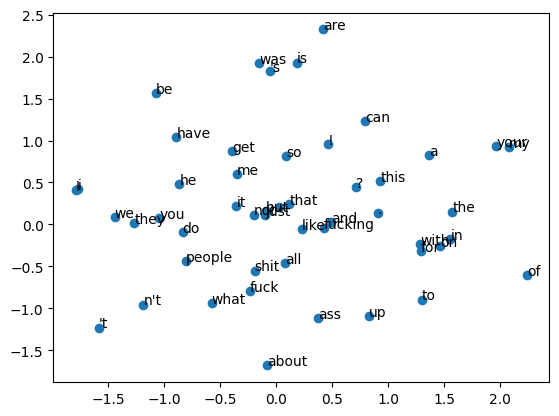

In [23]:
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for label, x, y in zip(words[:50], word_vectors_2d[:, 0], word_vectors_2d[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [24]:
model = Sequential()

In [25]:
model.add(Embedding(input_dim=len(words), output_dim=50,
                    weights=[word_vectors], trainable=True))

In [26]:
model.add(LSTM(128))

In [27]:
model.add(Dense(1))

In [28]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       654,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,150 (2.50 MB)

 Trainable params: 654,150 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
word_to_id = {word: i for i, word in enumerate(words)}
word_to_id

{'.': 0,
 'the': 1,
 ',': 2,
 'to': 3,
 'a': 4,
 'you': 5,
 'i': 6,
 'is': 7,
 'that': 8,
 'shit': 9,
 '?': 10,
 'and': 11,
 '!': 12,
 'of': 13,
 'it': 14,
 'this': 15,
 'in': 16,
 'fuck': 17,
 'are': 18,
 'I': 19,
 "'s": 20,
 'do': 21,
 'for': 22,
 'not': 23,
 'fucking': 24,
 'my': 25,
 'on': 26,
 "'t": 27,
 'they': 28,
 'be': 29,
 'me': 30,
 'like': 31,
 'just': 32,
 'with': 33,
 'was': 34,
 'what': 35,
 'about': 36,
 'have': 37,
 'up': 38,
 'he': 39,
 'your': 40,
 'so': 41,
 'get': 42,
 'but': 43,
 'people': 44,
 "n't": 45,
 'we': 46,
 'all': 47,
 'ass': 48,
 'can': 49,
 "'m": 50,
 'if': 51,
 'out': 52,
 'as': 53,
 'who': 54,
 'how': 55,
 'why': 56,
 '``': 57,
 'lol': 58,
 'no': 59,
 'bad': 60,
 'know': 61,
 'would': 62,
 'at': 63,
 'some': 64,
 'don': 65,
 '-': 66,
 'good': 67,
 'got': 68,
 'now': 69,
 'one': 70,
 'when': 71,
 'will': 72,
 'them': 73,
 'bitch': 74,
 'think': 75,
 'or': 76,
 'did': 77,
 'there': 78,
 'thing': 79,
 'their': 80,
 'she': 81,
 'go': 82,
 'an': 83,
 'goi

In [37]:
data['Tokens ID'] = data['Tokens'].apply(lambda x: [word_to_id[word] for word in x])
data

,Sentence,Style,Tokens,Tokens ID
0,he had steel balls too !,toxic,"[he, had, steel, balls, too, !]","[39, 147, 13082, 1358, 92, 12]"
1,"dude should have been taken to api , he would ...",toxic,"[dude, should, have, been, taken, to, api, ,, ...","[323, 102, 37, 128, 1246, 3, 9327, 2, 39, 62, ..."
2,"im not gonna sell the fucking picture , i just...",toxic,"[im, not, gon, na, sell, the, fucking, picture...","[118, 23, 182, 135, 1674, 1, 24, 1115, 2, 6, 3..."
3,the garbage that is being created by cnn and o...,toxic,"[the, garbage, that, is, being, created, by, c...","[1, 543, 8, 7, 126, 1585, 110, 1156, 11, 157, ..."
4,the reason they dont exist is because neither ...,toxic,"[the, reason, they, dont, exist, is, because, ...","[1, 408, 28, 121, 1245, 7, 87, 1244, 7, 4, 385..."
...,...,...,...,...
25035,both sides need to calm down or we are heading...,neutral,"[both, sides, need, to, calm, down, or, we, ar...","[291, 895, 109, 3, 982, 151, 76, 46, 18, 3497,..."
25036,i 'm sitting here in my calm german city conte...,neutral,"[i, 'm, sitting, here, in, my, calm, german, c...","[6, 50, 1003, 100, 16, 25, 982, 1685, 566, 286..."
25037,"dude , get a clue .",neutral,"[dude, ,, get, a, clue, .]","[323, 2, 42, 4, 670, 0]"
25038,"I was so high, it was amazing.",neutral,"[I, was, so, high, ,, it, was, amazing, .]","[19, 34, 41, 470, 2, 14, 34, 345, 0]"


In [38]:
tokens_list = data['Tokens ID'].values
tokens_list

array([list([39, 147, 13082, 1358, 92, 12]),
       list([323, 102, 37, 128, 1246, 3, 9327, 2, 39, 62, 29, 88, 63, 330, 33, 47, 1, 157, 13081, 78]),
       list([118, 23, 182, 135, 1674, 1, 24, 1115, 2, 6, 32, 97, 3, 2841, 3, 1, 24, 209, 0]),
       ..., list([323, 2, 42, 4, 670, 0]),
       list([19, 34, 41, 470, 2, 14, 34, 345, 0]),
       list([337, 40, 1544, 0])], dtype=object)

In [40]:
padded_sentences = pad_sequences(tokens_list, maxlen=10)
padded_sentences

array([[    0,     0,     0, ...,  1358,    92,    12],
       [   29,    88,    63, ...,   157, 13081,    78],
       [    6,    32,    97, ...,    24,   209,     0],
       ...,
       [    0,     0,     0, ...,     4,   670,     0],
       [    0,    19,    34, ...,    34,   345,     0],
       [    0,     0,     0, ...,    40,  1544,     0]], dtype=int32)

In [44]:
labels = [1 if label=='toxic' else 0 for label in data['Style']]
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [52]:
model.fit(padded_sentences, np.array(labels), epochs=5)

Epoch 1/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 4.4650
Epoch 2/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 7.9520
Epoch 3/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 7.9608
Epoch 4/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 8.0013
Epoch 5/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 8.1242
